In [23]:
#import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'CM Roman'
matplotlib.rcParams['font.size'] = 16

In [24]:
with open("./txt_data/SiPM_wav.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

t = []
voltage = []
for line in lines:
    t_line = line.split(';')[0].split(',')
    voltage_line = line.split(';')[1].split(',')
    t.append(np.array([float(x) for x in t_line]))
    voltage.append(np.array([float(x) for x in voltage_line]))

print(f'Number of waveforms: {len(voltage)}')

Number of waveforms: 1467


In [25]:
m = []
for wav in voltage:
    m.append(max(wav))
m = np.array(m)

discrimination_value = 0.01
index_dis = np.where(m > discrimination_value)[0]

#efficiency
eff = len(index_dis)/len(m)
eff_err = eff*(1/len(index_dis)+1/len(m))
print(f'Efficiency: {eff*100:0.1f} +- {eff_err*100:0.1f}%')

#discrimination
int_low = 1.5e-7 #SiPM
int_high = 1.8e-7
'''int_low = 2.3e-7 #SiPM_mirror
int_high = 2.6e-7'''
m_dis = m[index_dis] 

voltage_dis     =   []
t_dis           =   []
integral        =   []
for i in range(len(voltage)):
    if i in index_dis:
        index_max = np.where(m[i] == voltage[i])[0][0]
        ground = np.average(voltage[i][0:index_max-10])
        y = voltage[i]-ground
        voltage_dis.append(y)
        t_dis.append(t[i])

        #integration
        t_int = t[i][(t[i] >= int_low) & (t[i] <= int_high)]
        y_int = y[(t[i] >= int_low) & (t[i] <= int_high)]
        integral.append(simpson(y_int,t_int))

#average waveform
wav_average = sum(voltage_dis)/len(voltage_dis)

Efficiency: 87.8 +- 0.1%


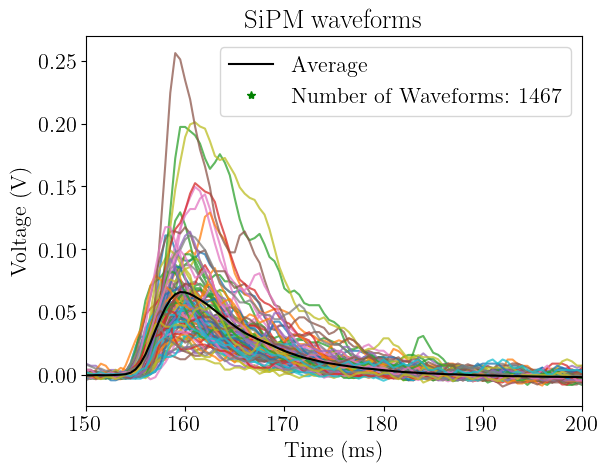

In [ ]:
#Figure
fig ,ax = plt.subplots()

for j in range(100):
    ax.plot(t_dis[j]*1e9, voltage_dis[j], alpha=0.75)

ax.plot(t_dis[0]*1e9, wav_average,'k', label='Average')
ax.plot([],[], '*',color='g', label=f'Number of Waveforms: {len(voltage)}')
#ax.set_xlim([220,280]) #SiPM with mirror
ax.set_xlim([150,200]) #SiPM
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Voltage (V)')
ax.set_title('SiPM waveforms')
ax.legend()

fig.savefig('../Images/SiPM_mirror_waveforms.pdf')

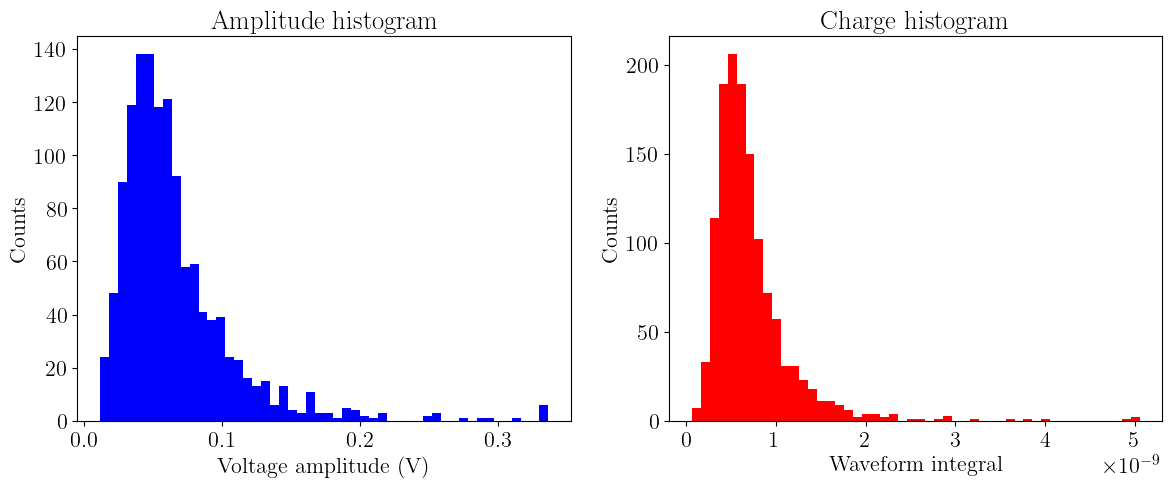

In [27]:
bins = 50
#Figure
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(14)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.hist(m_dis,bins = bins, color='b')
ax1.set_xlabel('Voltage amplitude (V)')
ax1.set_ylabel('Counts')
ax1.set_title('Amplitude histogram')

ax2.hist(integral,bins = bins, color='r')
ax2.set_xlabel('Waveform integral')
ax2.set_ylabel('Counts')
ax2.set_title('Charge histogram')

fig.savefig('../Images/SiPM_mirror_histograms.pdf')